## Part 1 Inspecting and selecting working light curve

* [exoplanet.eu](http://exoplanet.eu/catalog/HAT-P-44_b/)

Created: 10/27/2017

Last run:
* 10/28

In [1]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


In [2]:
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda35'

## import and parse csv

In [3]:
import glob
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline
#import multiprocessing

pl.style.use('seaborn-white')
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'

## import lc

In [71]:
import getpass
from tqdm import tqdm
data_dir = '.'

name='hatp44'
date='170215'
target_star_id='2'
comparison_star_id='1'#13, #3
radii_range='9-14'

data={}
data2={} #outliers remoed
bands='g,r,z'.split(',')
for b in bands:
    fname='lcf_msct_'+b+'_'+name+'_'+date+'_t'+target_star_id+'_c'+comparison_star_id+'_r'+radii_range+'.bjd.dat'
    df=pd.read_csv(os.path.join(data_dir,fname), delimiter=' ', parse_dates=True)
    try:
        df=df.drop(['Unnamed: 20','frame'],axis=1)
    except:
        pass
    df=df.set_index('BJD(TDB)-2450000')
    data[b]=df
    #outliers removed
    df2=df[np.abs(df-df.mean())<=(sigma*df.std())]
    data2[b]=df2

In [72]:
df.head()

,airmass,sky(ADU),dx(pix),dy(pix),fwhm(pix),peak(ADU),flux(r=9.0),err(r=9.0),flux(r=10.0),err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0),flux(r=13.0),err(r=13.0),flux(r=14.0),err(r=14.0)
BJD(TDB)-2450000,,,,,,,,,,,,,,,,,,
7800.099704,1.9195,770.0,1.571,1.098,9.23,8484.4,1.006060,0.002415,1.004150,0.002430,1.002697,0.002462,1.001681,0.002506,1.001059,0.002561,1.000910,0.002623
7800.100445,1.9101,760.9,1.183,1.363,8.84,8832.8,1.003645,0.002405,1.003763,0.002425,1.004157,0.002461,1.003590,0.002507,1.004013,0.002564,1.002980,0.002624
7800.101185,1.9007,759.6,2.001,0.490,8.45,9166.4,1.011944,0.002418,1.010547,0.002436,1.009671,0.002471,1.008578,0.002515,1.007796,0.002569,1.007015,0.002631
7800.101926,1.8915,758.3,2.197,1.278,8.64,9004.7,1.000177,0.002418,0.999711,0.002433,0.999450,0.002466,0.998745,0.002509,0.999686,0.002565,0.999818,0.002626
7800.102655,1.8826,754.0,1.232,1.128,8.03,9894.7,1.008416,0.002377,1.008160,0.002401,1.008227,0.002440,1.008178,0.002490,1.007604,0.002546,1.007852,0.002610


In [73]:
data[b].columns

Index(['airmass', 'sky(ADU)', 'dx(pix)', 'dy(pix)', 'fwhm(pix)', 'peak(ADU)',
       'flux(r=9.0)', 'err(r=9.0)', 'flux(r=10.0)', 'err(r=10.0)',
       'flux(r=11.0)', 'err(r=11.0)', 'flux(r=12.0)', 'err(r=12.0)',
       'flux(r=13.0)', 'err(r=13.0)', 'flux(r=14.0)', 'err(r=14.0)'],
      dtype='object')

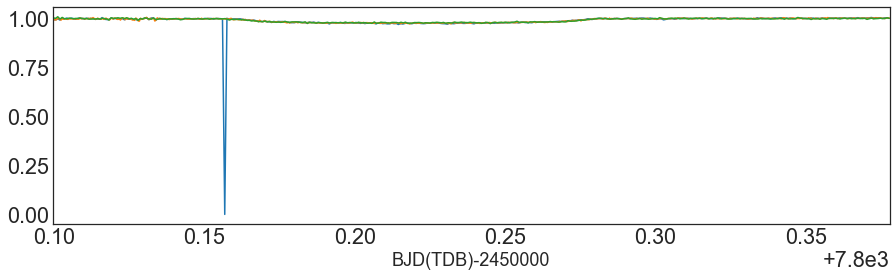

In [13]:
fluxcol='flux(r=9.0)'

fig,ax = pl.subplots(1,1,figsize=(15,4))
for b in sorted(bands):
    df=data[b]
    df[fluxcol].plot(label=b, ax=ax)

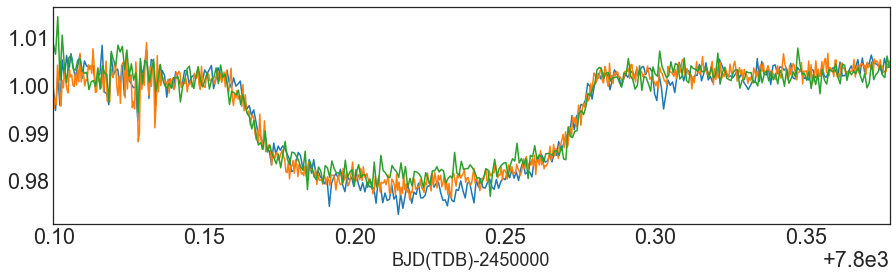

In [78]:
fluxcol='flux(r=9.0)'

fig,ax = pl.subplots(1,1,figsize=(15,4))
for b in sorted(bands):
    df=data2[b]
    df[fluxcol].plot(label=b, ax=ax)

## Other aperture radii

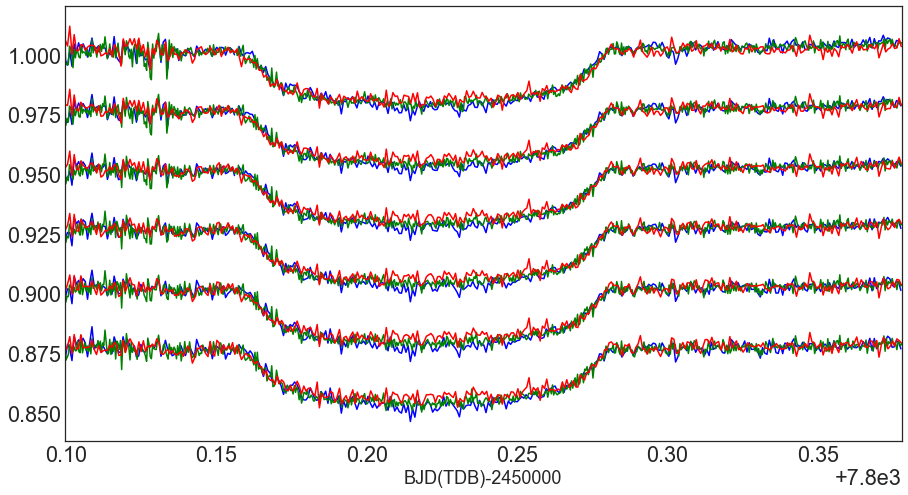

In [21]:
radii='flux(r=9.0),flux(r=10.0),flux(r=11.0),flux(r=12.0),flux(r=13.0),flux(r=14.0)'.split(',')
sigma=5

colors='b,g,r'.split(',')
fig,ax = pl.subplots(1,1,figsize=(15,8))
for n,r in enumerate(radii):
    offset = n*0.025
    for b,c in zip(sorted(bands),colors):
        df=data[b]
        #remove outlier
        df=df[np.abs(df-df.mean())<=(sigma*df.std())]
        df[r].apply(lambda x: x-offset).plot(color=c,label=b, ax=ax)

In [25]:
for n,r in enumerate(radii):
    print('---{}---'.format(r))
    for b,c in zip(sorted(bands),colors):
        df=data[b]
        #remove outlier
        df=df[np.abs(df-df.mean())<=(sigma*df.std())]
        #compute standard deviation
        std = df[r].std()
        print('{0}: {1:.4f}'.format(b,std))

---flux(r=9.0)---
g: 0.0106
r: 0.0102
z: 0.0095
---flux(r=10.0)---
g: 0.0105
r: 0.0101
z: 0.0095
---flux(r=11.0)---
g: 0.0106
r: 0.0101
z: 0.0095
---flux(r=12.0)---
g: 0.0106
r: 0.0101
z: 0.0095
---flux(r=13.0)---
g: 0.0106
r: 0.0101
z: 0.0095
---flux(r=14.0)---
g: 0.0107
r: 0.0102
z: 0.0095


It seems `flux(r=10.0)` has least scatter.

## Other comparison star (i.d.=13)

In [75]:
data_dir='.'

name='hatp44'
date='170215'
target_star_id='2'
comparison_star_id='13'#3
radii_range='9-14'

data={}
data2={} #outliers remoed
bands='g,r,z'.split(',')
for b in bands:
    fname='lcf_msct_'+b+'_'+name+'_'+date+'_t'+target_star_id+'_c'+comparison_star_id+'_r'+radii_range+'.bjd.dat'
    df=pd.read_csv(os.path.join(data_dir,fname), delimiter=' ', parse_dates=True)
    cols = df.columns.tolist()
    cols.remove('#')
    cols.insert(-1,' ')
    df.columns = cols
    try:
        df=df.drop(['Unnamed: 21','frame',' '],axis=1)
    except:
        pass
    df=df.set_index('BJD(TDB)-2450000')
    data[b]=df
    #outliers removed
    df2=df[np.abs(df-df.mean())<=(sigma*df.std())]
    data2[b]=df2

In [76]:
df.head()

,airmass,sky(ADU),dx(pix),dy(pix),fwhm(pix),peak(ADU),flux(r=9.0),err(r=9.0),flux(r=10.0),err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0),flux(r=13.0),err(r=13.0),flux(r=14.0),err(r=14.0)
BJD(TDB)-2450000,,,,,,,,,,,,,,,,,,
7800.099704,1.9195,769.0,1.571,1.098,9.52,8484.4,1.008784,0.002271,1.005945,0.002288,1.004211,0.002324,1.003111,0.002372,1.002090,0.002429,1.002103,0.002496
7800.100445,1.9101,759.6,1.183,1.363,9.05,8832.8,1.006547,0.002261,1.005888,0.002283,1.005840,0.002323,1.005248,0.002372,1.005178,0.002431,1.003958,0.002494
7800.101185,1.9007,758.7,2.001,0.490,8.82,9166.4,1.014396,0.002273,1.012732,0.002296,1.011233,0.002333,1.010332,0.002383,1.009567,0.002441,1.008458,0.002506
7800.101926,1.8915,757.1,2.197,1.278,8.82,9004.7,1.001108,0.002271,1.000193,0.002290,0.999210,0.002325,0.998171,0.002371,0.998673,0.002430,0.999014,0.002494
7800.102655,1.8826,753.3,1.232,1.128,8.28,9894.7,1.010541,0.002235,1.009920,0.002263,1.009409,0.002305,1.009090,0.002359,1.007839,0.002417,1.007942,0.002484


Try to beat:
```
---flux(r=10.0)---
g: 0.0105
r: 0.0101
z: 0.0095
```

In [68]:
sigma=5
for n,r in enumerate(radii):
    print('---{}---'.format(r))
    for b,c in zip(sorted(bands),colors):
        df=data[b]
        #remove outlier
        df=df[np.abs(df-df.mean())<=(sigma*df.std())]
        #compute standard deviation
        std = df[r].std()
        print('{0}: {1:.4f}'.format(b,std))

---flux(r=9.0)---
g: 0.0106
r: 0.0100
z: 0.0096
---flux(r=10.0)---
g: 0.0105
r: 0.0100
z: 0.0096
---flux(r=11.0)---
g: 0.0105
r: 0.0100
z: 0.0095
---flux(r=12.0)---
g: 0.0106
r: 0.0100
z: 0.0095
---flux(r=13.0)---
g: 0.0106
r: 0.0100
z: 0.0095
---flux(r=14.0)---
g: 0.0107
r: 0.0100
z: 0.0095


It seems this is better
```
---flux(r=11.0)---
g: 0.0105
r: 0.0100
z: 0.0095
```

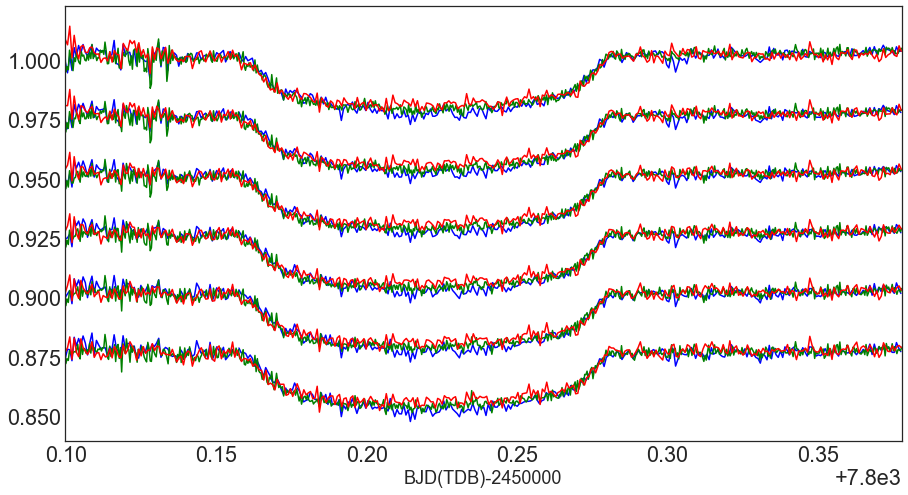

In [69]:
radii='flux(r=9.0),flux(r=10.0),flux(r=11.0),flux(r=12.0),flux(r=13.0),flux(r=14.0)'.split(',')
sigma=5

colors='b,g,r'.split(',')
fig,ax = pl.subplots(1,1,figsize=(15,8))
for n,r in enumerate(radii):
    offset = n*0.025
    for b,c in zip(sorted(bands),colors):
        df=data[b]
        #remove outlier
        df=df[np.abs(df-df.mean())<=(sigma*df.std())]
        df[r].apply(lambda x: x-offset).plot(color=c,label=b, ax=ax)

## Save

In [77]:
for b in sorted(bands):
    fname='hatp44_QL_{}-band.csv'.format(b)
    data2[b].to_csv(fname)

## Other comparison star (i.d.=3)

In [57]:
data_dir='.'

name='hatp44'
date='170215'
target_star_id='2'
comparison_star_id='3'
radii_range='9-14'

data={}
data2={} #outliers remoed
bands='g,r,z'.split(',')
for b in bands:
    fname='lcf_msct_'+b+'_'+name+'_'+date+'_t'+target_star_id+'_c'+comparison_star_id+'_r'+radii_range+'.bjd.dat'
    df=pd.read_csv(os.path.join(data_dir,fname), delimiter=' ', parse_dates=True)
    cols = df.columns.tolist()
    cols.remove('#')
    cols.insert(-1,' ')
    df.columns = cols
    try:
        df=df.drop(['Unnamed: 21','frame',' '],axis=1)
    except:
        pass
    df=df.set_index('BJD(TDB)-2450000')
    data[b]=df

In [58]:
df.head()

,airmass,sky(ADU),dx(pix),dy(pix),fwhm(pix),peak(ADU),flux(r=9.0),err(r=9.0),flux(r=10.0),err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0),flux(r=13.0),err(r=13.0),flux(r=14.0),err(r=14.0)
BJD(TDB)-2450000,,,,,,,,,,,,,,,,,,
7800.099704,1.9195,768.8,1.571,1.098,9.59,8254.4,1.016158,0.003342,1.011175,0.003386,1.009607,0.003473,1.007934,0.003576,1.006431,0.003695,1.006188,0.003830
7800.100445,1.9101,759.2,1.183,1.363,9.10,8551.4,1.014347,0.003331,1.011904,0.003386,1.011640,0.003478,1.010615,0.003584,1.009840,0.003706,1.007538,0.003830
7800.101185,1.9007,758.7,2.001,0.490,8.93,9053.4,1.021126,0.003358,1.018898,0.003421,1.016754,0.003508,1.015933,0.003619,1.015673,0.003747,1.013144,0.003874
7800.101926,1.8915,757.2,2.197,1.278,8.96,8176.7,1.004218,0.003325,1.002317,0.003378,1.000460,0.003457,0.998275,0.003552,0.998208,0.003671,0.998411,0.003801
7800.102655,1.8826,753.6,1.232,1.128,8.25,9507.8,1.016488,0.003286,1.015072,0.003356,1.014029,0.003451,1.012696,0.003561,1.010313,0.003678,1.009439,0.003810


To beat
```
---flux(r=11.0)---
g: 0.0105
r: 0.0100
z: 0.0095
```

In [59]:
sigma=5
for n,r in enumerate(radii):
    print('---{}---'.format(r))
    for b,c in zip(sorted(bands),colors):
        df=data[b]
        #remove outlier
        df=df[np.abs(df-df.mean())<=(sigma*df.std())]
        #compute standard deviation
        std = df[r].std()
        print('{0}: {1:.4f}'.format(b,std))

---flux(r=9.0)---
g: 0.0108
r: 0.0099
z: 0.0100
---flux(r=10.0)---
g: 0.0108
r: 0.0099
z: 0.0099
---flux(r=11.0)---
g: 0.0108
r: 0.0099
z: 0.0098
---flux(r=12.0)---
g: 0.0109
r: 0.0099
z: 0.0097
---flux(r=13.0)---
g: 0.0110
r: 0.0099
z: 0.0097
---flux(r=14.0)---
g: 0.0111
r: 0.0099
z: 0.0098


Ok, comparison_star_id=13 won
```
---flux(r=11.0)---
g: 0.0105
r: 0.0100
z: 0.0095
```